In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key# Make a 'Get' request for the city weather.

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cambridge
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | dandong
Processing Record 4 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | maridi
Processing Record 7 of Set 1 | grand gaube
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | weligama
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | havoysund
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | maniitsoq
Processing Record 20 of Set 1 | lagunas
Processing Record 21 of Set 1 | bulolo
Processing Record 22 of Set 1 | hil

Processing Record 40 of Set 4 | taman
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | kallithea
Processing Record 43 of Set 4 | utiroa
City not found. Skipping...
Processing Record 44 of Set 4 | bacolod
Processing Record 45 of Set 4 | reinosa
Processing Record 46 of Set 4 | katobu
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | sorland
Processing Record 1 of Set 5 | copiapo
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | ordynskoye
Processing Record 6 of Set 5 | balimo
City not found. Skipping...
Processing Record 7 of Set 5 | seoul
Processing Record 8 of Set 5 | leeston
Processing Record 9 of Set 5 | malwan
City not found. Skipping...
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | pevek
Processing R

Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | camana
Processing Record 31 of Set 8 | kirkland lake
Processing Record 32 of Set 8 | wanning
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 35 of Set 8 | san andres
Processing Record 36 of Set 8 | mago
Processing Record 37 of Set 8 | sedniv
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | waihi
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | poum
Processing Record 43 of Set 8 | pasni
Processing Record 44 of Set 8 | hunza
City not found. Skipping...
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | achit
Processing Record 47 of Set 8 | nizhniy ingash
Processing Record 48 of Set 8 | vanderhoof
Processing Record 49 of Set 8 | krasnoselkup
Processing Record 50 of Set 8 | mangaratiba
Processing Record 1 of Set 9 | valpa

Processing Record 17 of Set 12 | gunjur
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | nyurba
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | haines junction
Processing Record 22 of Set 12 | kisii
Processing Record 23 of Set 12 | maceio
Processing Record 24 of Set 12 | kaspiyskiy
Processing Record 25 of Set 12 | sao lourenco do sul
Processing Record 26 of Set 12 | synya
Processing Record 27 of Set 12 | namie
Processing Record 28 of Set 12 | talnakh
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | calais
Processing Record 31 of Set 12 | hasaki
Processing Record 32 of Set 12 | alta floresta
Processing Record 33 of Set 12 | clarence town
Processing Record 34 of Set 12 | lhokseumawe
Processing Record 35 of Set 12 | champerico
Processing Record 36 of Set 12 | mattru
Processing Record 37 of Set 12 | yakeshi
Processing Record 38 of Set 12 | shentala
Processing Record 39 of Set 12 | nantucket
Processing Recor

In [9]:
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cambridge,43.3601,-80.3127,38.75,84,100,14.97,CA,2022-03-26 21:38:56
1,Atuona,-9.8000,-139.0333,79.39,76,42,15.17,PF,2022-03-26 21:38:50
2,Dandong,40.1292,124.3947,39.94,56,100,6.38,CN,2022-03-26 21:42:42
3,Petropavlovsk-Kamchatskiy,53.0452,158.6483,17.78,62,0,6.71,RU,2022-03-26 21:40:26
4,Ribeira Grande,38.5167,-28.7000,59.40,82,75,10.36,PT,2022-03-26 21:42:42
5,Maridi,4.9158,29.4742,74.23,63,61,5.12,SS,2022-03-26 21:42:43
6,Grand Gaube,-20.0064,57.6608,80.38,82,5,3.00,MU,2022-03-26 21:42:43
7,Hobart,-42.8794,147.3294,56.05,94,20,1.14,AU,2022-03-26 21:34:22
8,Weligama,5.9667,80.4167,75.34,89,3,4.61,LK,2022-03-26 21:42:43
9,Mataura,-46.1927,168.8643,56.89,81,25,0.07,NZ,2022-03-26 21:37:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cambridge,CA,2022-03-26 21:38:56,43.3601,-80.3127,38.75,84,100,14.97
1,Atuona,PF,2022-03-26 21:38:50,-9.8000,-139.0333,79.39,76,42,15.17
2,Dandong,CN,2022-03-26 21:42:42,40.1292,124.3947,39.94,56,100,6.38
3,Petropavlovsk-Kamchatskiy,RU,2022-03-26 21:40:26,53.0452,158.6483,17.78,62,0,6.71
4,Ribeira Grande,PT,2022-03-26 21:42:42,38.5167,-28.7000,59.40,82,75,10.36
5,Maridi,SS,2022-03-26 21:42:43,4.9158,29.4742,74.23,63,61,5.12
6,Grand Gaube,MU,2022-03-26 21:42:43,-20.0064,57.6608,80.38,82,5,3.00
7,Hobart,AU,2022-03-26 21:34:22,-42.8794,147.3294,56.05,94,20,1.14
8,Weligama,LK,2022-03-26 21:42:43,5.9667,80.4167,75.34,89,3,4.61
9,Mataura,NZ,2022-03-26 21:37:39,-46.1927,168.8643,56.89,81,25,0.07


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

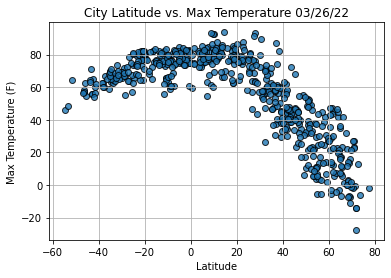

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

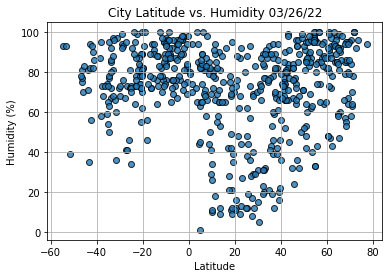

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

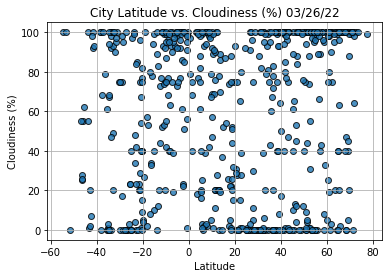

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

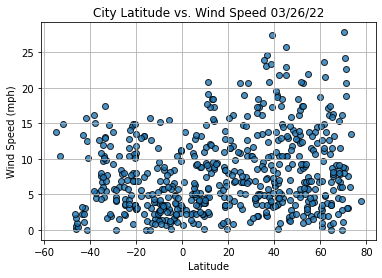

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates_line, text_coordinates_rvalue):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates_line, fontsize=15, color="red")
    plt.annotate("r value = " +str(round(r_value,2)), text_coordinates_rvalue , fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()